In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
data = pd.read_csv("HRR Scorecard_ 20 _ 40 _ 60 - 40 Population.csv").copy()
hrr=data.drop(data.columns[9:],axis=1)
hrr.head()

,HRR,Total Hospital Beds,Total ICU Beds,Available Hospital Beds,Potentially Available Hospital Beds*,Available ICU Beds,Potentially Available ICU Beds*,Adult Population,Population 65+
0,"Abilene, TX",980,127,565,772,68.0,98,"226,444","50,412"
1,"Akron, OH","1,358",186,518,938,94.0,140,"547,990","111,042"
2,"Alameda County, CA","2,695",293,665,"1,680",139.0,216,"1,310,189","214,991"
3,"Albany, GA",704,60,221,462,27.0,43,"157,143","30,466"
4,"Albany, NY","4,804",425,"1,579","3,191",193.0,309,"1,477,723","318,695"


In [3]:
hrr.isnull().sum()

HRR                                     1
Total Hospital Beds                     2
Total ICU Beds                          2
Available Hospital Beds                 2
Potentially Available Hospital Beds*    2
Available ICU Beds                      2
Potentially Available ICU Beds*         2
Adult Population                        2
Population 65+                          2
dtype: int64

In [4]:
hrr=hrr.dropna()
hrr.isnull().sum()

HRR                                     0
Total Hospital Beds                     0
Total ICU Beds                          0
Available Hospital Beds                 0
Potentially Available Hospital Beds*    0
Available ICU Beds                      0
Potentially Available ICU Beds*         0
Adult Population                        0
Population 65+                          0
dtype: int64

In [5]:
hrr.index = hrr.iloc[:,0]
hrr.head()

,HRR,Total Hospital Beds,Total ICU Beds,Available Hospital Beds,Potentially Available Hospital Beds*,Available ICU Beds,Potentially Available ICU Beds*,Adult Population,Population 65+
HRR,,,,,,,,,
"Abilene, TX","Abilene, TX",980,127,565,772,68.0,98,"226,444","50,412"
"Akron, OH","Akron, OH","1,358",186,518,938,94.0,140,"547,990","111,042"
"Alameda County, CA","Alameda County, CA","2,695",293,665,"1,680",139.0,216,"1,310,189","214,991"
"Albany, GA","Albany, GA",704,60,221,462,27.0,43,"157,143","30,466"
"Albany, NY","Albany, NY","4,804",425,"1,579","3,191",193.0,309,"1,477,723","318,695"


In [77]:
hrr = hrr.iloc[:,1:]
hrr.tail()

,Total Hospital Beds,Total ICU Beds,Available Hospital Beds,Potentially Available Hospital Beds*,Available ICU Beds,Potentially Available ICU Beds*,Adult Population,Population 65+
HRR,,,,,,,,
"Winston-Salem, NC","2,870",499,843,"1,857",40.0,269,"899,862","197,294"
"Worcester, MA","1,525",169,425,975,43.0,106,"652,386","122,123"
"Yakima, WA",369,58,200,285,33.0,45,"220,972","40,707"
"York, PA",868,79,267,567,8.0,43,"343,334","73,773"
"Youngstown, OH","1,555",158,543,"1,049",66.0,112,"493,628","124,167"


In [78]:
hrr.index.name=None
hrr.head()

,Total Hospital Beds,Total ICU Beds,Available Hospital Beds,Potentially Available Hospital Beds*,Available ICU Beds,Potentially Available ICU Beds*,Adult Population,Population 65+
"Abilene, TX",980,127,565,772,68.0,98,"226,444","50,412"
"Akron, OH","1,358",186,518,938,94.0,140,"547,990","111,042"
"Alameda County, CA","2,695",293,665,"1,680",139.0,216,"1,310,189","214,991"
"Albany, GA",704,60,221,462,27.0,43,"157,143","30,466"
"Albany, NY","4,804",425,"1,579","3,191",193.0,309,"1,477,723","318,695"


In [79]:
hrr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 305 entries, Abilene, TX to Youngstown, OH
Data columns (total 8 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Total Hospital Beds                   305 non-null    object 
 1   Total ICU Beds                        305 non-null    object 
 2   Available Hospital Beds               305 non-null    object 
 3   Potentially Available Hospital Beds*  305 non-null    object 
 4   Available ICU Beds                    305 non-null    float64
 5   Potentially Available ICU Beds*       305 non-null    object 
 6   Adult Population                      305 non-null    object 
 7   Population 65+                        305 non-null    object 
dtypes: float64(1), object(7)
memory usage: 21.4+ KB


In [80]:
hrr = hrr.replace(',','', regex=True)

cols = hrr.columns.drop('Available ICU Beds')

hrr[cols] = hrr[cols].apply(pd.to_numeric, errors='coerce')
hrr.dtypes

Total Hospital Beds                       int64
Total ICU Beds                            int64
Available Hospital Beds                   int64
Potentially Available Hospital Beds*      int64
Available ICU Beds                      float64
Potentially Available ICU Beds*           int64
Adult Population                          int64
Population 65+                            int64
dtype: object

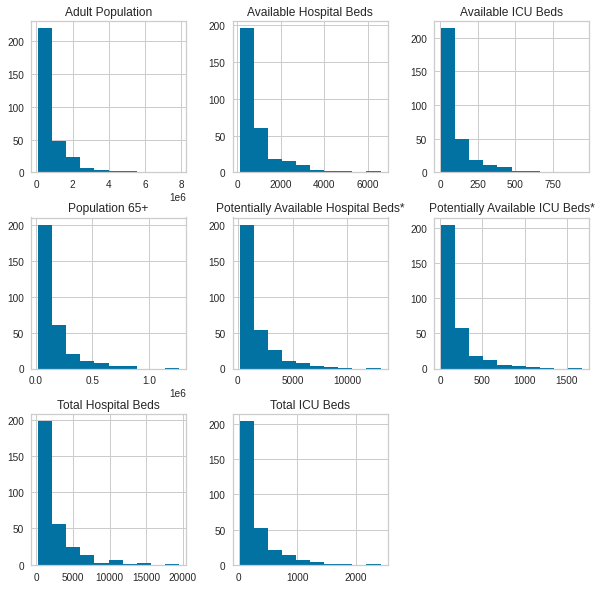

In [81]:
hrr.hist(figsize = (10,10));

In [82]:
df=hrr.copy()
df['THB_per_adult'] = df['Total Hospital Beds'] / df['Adult Population']
df['AHB_per_adult'] = df['Available Hospital Beds'] / df['Adult Population']
df['PAHB_per_adult'] = df['Potentially Available Hospital Beds*'] / df['Adult Population']
df['THB_per_65+'] = df['Total Hospital Beds'] / df['Population 65+']
df['AHB_per_65+'] = df['Available Hospital Beds'] / df['Population 65+']
df['PAHB_per_65+'] = df['Potentially Available Hospital Beds*'] / df['Population 65+']
df['TIB_per_adult'] = df['Total ICU Beds'] / df['Adult Population']
df['AIB_per_adult'] = df['Available ICU Beds'] / df['Adult Population']
df['PAIB_per_adult'] = df['Potentially Available ICU Beds*'] / df['Adult Population']
df['TIB_per_65+'] = df['Total ICU Beds'] / df['Population 65+']
df['AIB_per_65+'] = df['Available ICU Beds'] / df['Population 65+']
df['PAIB_per_65+'] = df['Potentially Available ICU Beds*'] / df['Population 65+']
df= df.drop(df.columns[:8],axis=1)

In [83]:
df.head(10)

,THB_per_adult,AHB_per_adult,PAHB_per_adult,THB_per_65+,AHB_per_65+,PAHB_per_65+,TIB_per_adult,AIB_per_adult,PAIB_per_adult,TIB_per_65+,AIB_per_65+,PAIB_per_65+
"Abilene, TX",0.004328,0.002495,0.003409,0.019440,0.011208,0.015314,0.000561,0.000300,0.000433,0.002519,0.001349,0.001944
"Akron, OH",0.002478,0.000945,0.001712,0.012230,0.004665,0.008447,0.000339,0.000172,0.000255,0.001675,0.000847,0.001261
"Alameda County, CA",0.002057,0.000508,0.001282,0.012535,0.003093,0.007814,0.000224,0.000106,0.000165,0.001363,0.000647,0.001005
"Albany, GA",0.004480,0.001406,0.002940,0.023108,0.007254,0.015164,0.000382,0.000172,0.000274,0.001969,0.000886,0.001411
"Albany, NY",0.003251,0.001069,0.002159,0.015074,0.004955,0.010013,0.000288,0.000131,0.000209,0.001334,0.000606,0.000970
"Albuquerque, NM",0.002175,0.000824,0.001500,0.010406,0.003943,0.007175,0.000284,0.000120,0.000202,0.001360,0.000576,0.000966
"Alexandria, LA",0.004138,0.001814,0.002978,0.020598,0.009030,0.014825,0.000194,0.000090,0.000140,0.000966,0.000449,0.000696
"Allentown, PA",0.003401,0.001319,0.002360,0.015754,0.006110,0.010932,0.000348,0.000149,0.000248,0.001611,0.000690,0.001148
"Altoona, PA",0.002366,0.000998,0.001680,0.009826,0.004143,0.006976,0.000260,0.000115,0.000188,0.001080,0.000478,0.000779
"Amarillo, TX",0.003715,0.002038,0.002877,0.020174,0.011066,0.015620,0.000583,0.000237,0.000412,0.003166,0.001289,0.002236


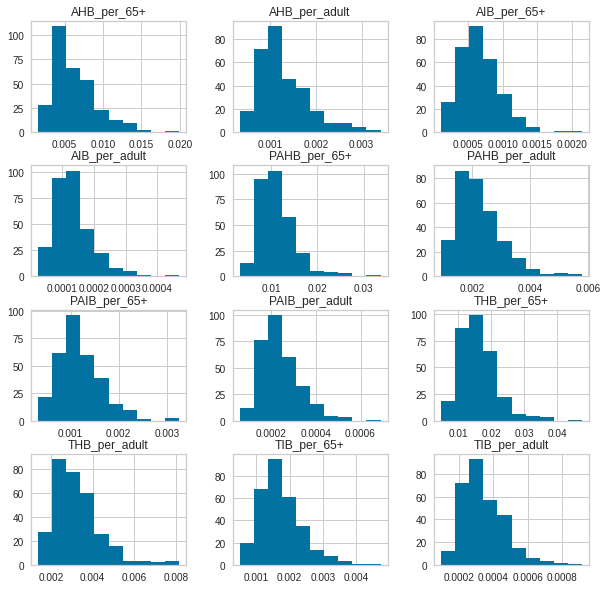

In [84]:
df.hist(figsize = (10,10));

In [85]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
THB_per_adult,305.0,0.003263,0.001107,0.001389,0.002475,0.003081,0.003796,0.008153
AHB_per_adult,305.0,0.001275,0.000556,0.000323,0.000897,0.001126,0.001568,0.003415
PAHB_per_adult,305.0,0.002269,0.000804,0.000935,0.001694,0.002112,0.002722,0.005781
THB_per_65+,305.0,0.016171,0.005573,0.004874,0.012523,0.015191,0.018880,0.047454
AHB_per_65+,305.0,0.006299,0.002748,0.001562,0.004298,0.005603,0.007750,0.019893
PAHB_per_65+,305.0,0.011235,0.004022,0.003221,0.008445,0.010552,0.013138,0.033674
TIB_per_adult,305.0,0.000344,0.000125,0.000096,0.000256,0.000322,0.000417,0.000916
AIB_per_adult,305.0,0.000134,0.000059,0.000023,0.000096,0.000124,0.000161,0.000468
PAIB_per_adult,305.0,0.000239,0.000087,0.000061,0.000178,0.000222,0.000287,0.000689
TIB_per_65+,305.0,0.001712,0.000643,0.000496,0.001284,0.001612,0.002035,0.004728


In [86]:
from sklearn.preprocessing import StandardScaler

scaled_df = StandardScaler().fit_transform(df)
scaled_df= pd.DataFrame(scaled_df)
scaled_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.963315,2.199840,1.420265,0.587476,1.789401,1.015832,1.729552,2.807104,2.220841,1.256598,2.386351,1.713062
1,-0.710490,-0.593856,-0.694024,-0.708538,-0.595694,-0.694274,-0.038427,0.627218,0.185143,-0.058091,0.628494,0.161527
2,-1.091643,-1.382870,-1.228913,-0.653571,-1.168660,-0.851915,-0.962970,-0.480753,-0.855301,-0.544277,-0.071304,-0.420053
3,1.101060,0.237299,0.835827,1.246772,0.348132,0.978632,0.300086,0.631994,0.393617,0.400332,0.767438,0.503595
4,-0.011153,-0.371663,-0.136415,-0.197271,-0.490095,-0.304400,-0.452171,-0.065719,-0.347306,-0.589882,-0.214576,-0.499797


In [87]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca_fit = pca.fit_transform(scaled_df)

In [88]:
reduced_df = pd.DataFrame(data = pca_fit, 
                          columns = ["variable_1","variable_2"], index=df.index)
reduced_df.head()

,variable_1,variable_2
"Abilene, TX",5.739599,-1.322061
"Akron, OH",-0.771787,-1.552185
"Alameda County, CA",-2.826317,-0.797920
"Albany, GA",2.252126,0.448998
"Albany, NY",-1.060689,0.233284


In [89]:
pca.explained_variance_ratio_

array([0.60646994, 0.28155017])

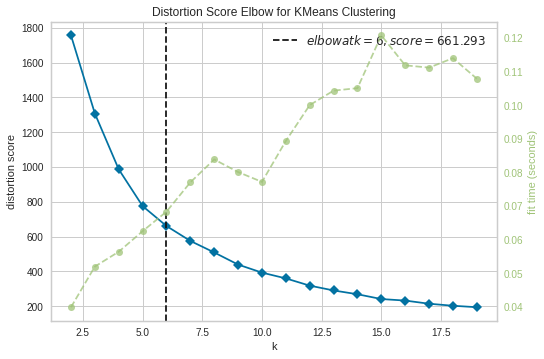

In [90]:
from warnings import filterwarnings
filterwarnings('ignore')
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2,20))
visualizer.fit(reduced_df) 
visualizer.poof();

In [118]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 2)
k_fit = kmeans.fit(reduced_df)

In [119]:
clusters = k_fit.labels_
clusters

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,

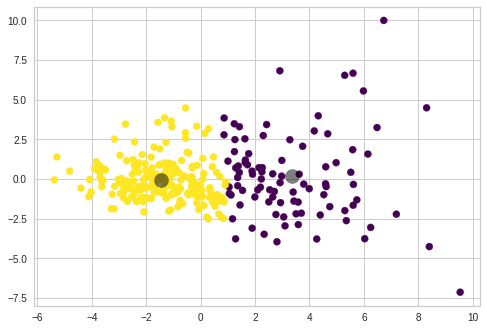

In [120]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.scatter(reduced_df.iloc[:,0], reduced_df.iloc[:,1], c = clusters, s = 50, cmap = "viridis")

centers = k_fit.cluster_centers_

plt.scatter(centers[:,0], centers[:,1], c = "black", s = 200, alpha = 0.5);

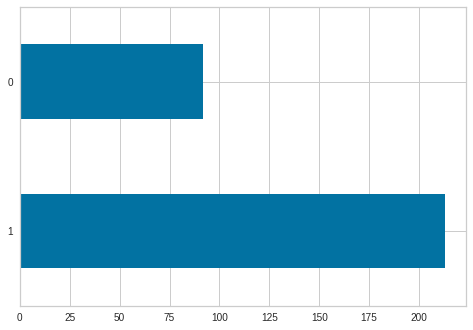

In [121]:
df["class"] = clusters
df["class"].value_counts().plot.barh();

In [122]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from catboost import CatBoostClassifier

In [123]:
data = df.copy()
y = data["class"]
X = data.drop(['class'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [124]:
knn_params = {"n_neighbors": np.arange(1,50)}

In [125]:
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, knn_params, cv=10)
knn_cv.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [126]:
print("best parameter: " + str(knn_cv.best_params_))

best parameter: {'n_neighbors': 3}


In [127]:
knn = KNeighborsClassifier(3)
knn_tuned = knn.fit(X_train, y_train)

In [128]:
y_pred = knn_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.9021739130434783

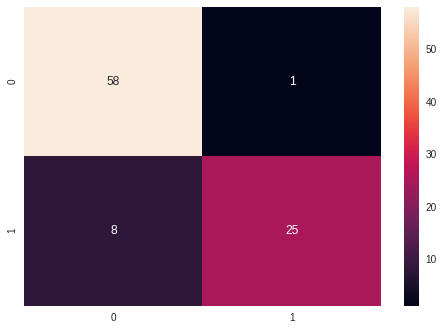

In [103]:
cf_matrix= confusion_matrix(y_test,y_pred)
sns.heatmap(cf_matrix, annot=True,fmt='.3g');

In [104]:
catb_params = {
    'iterations': [200,500],
    'learning_rate': [0.01,0.05, 0.1],
    'depth': [3,5,8] }

In [105]:
catb = CatBoostClassifier()
catb_cv_model = GridSearchCV(catb, catb_params, cv=5, n_jobs = -1, verbose = 2)
catb_cv_model.fit(X_train, y_train)
catb_cv_model.best_params_

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   10.2s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:  1.2min finished


0:	learn: 0.6267558	total: 8.79ms	remaining: 4.38s
1:	learn: 0.5566952	total: 13.9ms	remaining: 3.47s
2:	learn: 0.5048925	total: 18.8ms	remaining: 3.12s
3:	learn: 0.4536417	total: 23.7ms	remaining: 2.94s
4:	learn: 0.4124047	total: 28.6ms	remaining: 2.83s
5:	learn: 0.3777886	total: 33.7ms	remaining: 2.77s
6:	learn: 0.3388658	total: 38.7ms	remaining: 2.72s
7:	learn: 0.3116183	total: 43.5ms	remaining: 2.67s
8:	learn: 0.2925581	total: 44.5ms	remaining: 2.42s
9:	learn: 0.2698468	total: 49.6ms	remaining: 2.43s
10:	learn: 0.2494485	total: 54.6ms	remaining: 2.43s
11:	learn: 0.2285496	total: 59.4ms	remaining: 2.42s
12:	learn: 0.2115839	total: 64.3ms	remaining: 2.41s
13:	learn: 0.1940393	total: 69.1ms	remaining: 2.4s
14:	learn: 0.1803082	total: 74ms	remaining: 2.39s
15:	learn: 0.1684448	total: 79ms	remaining: 2.39s
16:	learn: 0.1551606	total: 83.7ms	remaining: 2.38s
17:	learn: 0.1460879	total: 88.6ms	remaining: 2.37s
18:	learn: 0.1373499	total: 93.6ms	remaining: 2.37s
19:	learn: 0.1291862	total:

{'depth': 8, 'iterations': 500, 'learning_rate': 0.05}

In [106]:
catb = CatBoostClassifier(iterations = 500, 
                          learning_rate = 0.05, 
                          depth = 8)

catb_tuned = catb.fit(X_train, y_train)
y_pred = catb_tuned.predict(X_test)

0:	learn: 0.6267558	total: 6.5ms	remaining: 3.24s
1:	learn: 0.5566952	total: 12.7ms	remaining: 3.16s
2:	learn: 0.5048925	total: 18ms	remaining: 2.98s
3:	learn: 0.4536417	total: 23.1ms	remaining: 2.86s
4:	learn: 0.4124047	total: 28.2ms	remaining: 2.79s
5:	learn: 0.3777886	total: 33.3ms	remaining: 2.74s
6:	learn: 0.3388658	total: 38.6ms	remaining: 2.72s
7:	learn: 0.3116183	total: 43.7ms	remaining: 2.68s
8:	learn: 0.2925581	total: 44.6ms	remaining: 2.43s
9:	learn: 0.2698468	total: 50.1ms	remaining: 2.45s
10:	learn: 0.2494485	total: 55.3ms	remaining: 2.46s
11:	learn: 0.2285496	total: 60.4ms	remaining: 2.45s
12:	learn: 0.2115839	total: 65.7ms	remaining: 2.46s
13:	learn: 0.1940393	total: 70.8ms	remaining: 2.46s
14:	learn: 0.1803082	total: 77ms	remaining: 2.49s
15:	learn: 0.1684448	total: 83.1ms	remaining: 2.52s
16:	learn: 0.1551606	total: 88.2ms	remaining: 2.5s
17:	learn: 0.1460879	total: 93.8ms	remaining: 2.51s
18:	learn: 0.1373499	total: 99.4ms	remaining: 2.52s
19:	learn: 0.1291862	total: 

In [107]:
y_pred = catb_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.967391304347826

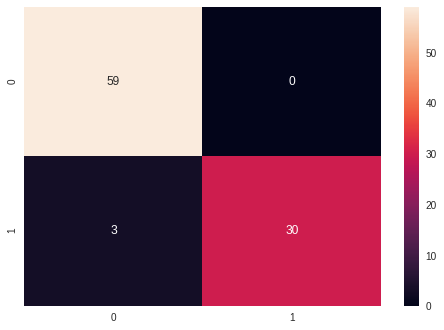

In [108]:
cf_matrix= confusion_matrix(y_test,y_pred)
sns.heatmap(cf_matrix, annot=True,fmt='.3g');

In [109]:
nb = GaussianNB()
nb_model = nb.fit(X_train, y_train)
nb_model

GaussianNB(priors=None, var_smoothing=1e-09)

In [110]:
y_pred = nb_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.967391304347826

In [111]:
cross_val_score(nb_model, X_test, y_test, cv = 10).mean()

0.9677777777777777

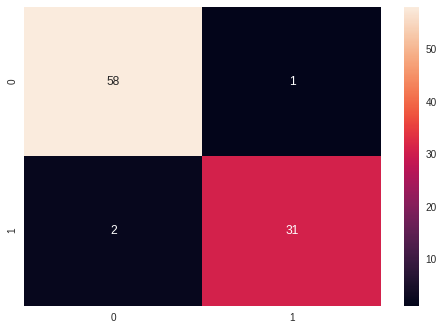

In [112]:
cf_matrix= confusion_matrix(y_test,y_pred)
sns.heatmap(cf_matrix, annot=True,fmt='.3g');

In [113]:
models = [
    knn_tuned,
    catb_tuned,
    nb_model,   
]

for model in models:
    names = model.__class__.__name__
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(names + ":" )
    print("Accuracy: {:.4%}".format(accuracy))

KNeighborsClassifier:
Accuracy: 90.2174%
CatBoostClassifier:
Accuracy: 96.7391%
GaussianNB:
Accuracy: 96.7391%
